# "Heart_Stroke_Prediction"

In [1]:
#Importing Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv("E:/rakshitha/mini project heart_stroke/heart_stroke_dataset.csv")
df

,ID,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Preprosessing

In [2]:
#univariate analysis using statistical methods
df.describe()

,ID,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
#identifying missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#handling missing values using fillna ()
mean=df["bmi"].mean()
df["bmi"]=df["bmi"].fillna(mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#one hot encoding
df["smoking_status"]=df["smoking_status"].map({"Unknown":0,"never smoked":1,"formerly smoked":2,"smokes":3})
df["gender"]=df["gender"].map({"Male":0,"Female":1})
df.describe()

,ID,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5109.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.586025,43.226614,0.097456,0.054012,106.147677,28.893237,1.179843,0.048728
std,21161.721625,0.492592,22.612647,0.296607,0.226063,45.283560,7.698018,1.029961,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,36932.000000,1.000000,45.000000,0.000000,0.000000,91.885000,28.400000,1.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,114.090000,32.800000,2.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [6]:
df["gender"]=df["gender"].fillna(method="bfill",axis=0)
df["gender"]

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5105    1.0
5106    1.0
5107    1.0
5108    0.0
5109    1.0
Name: gender, Length: 5110, dtype: float64

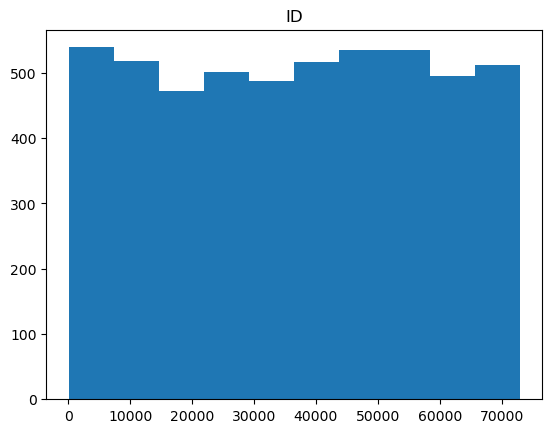

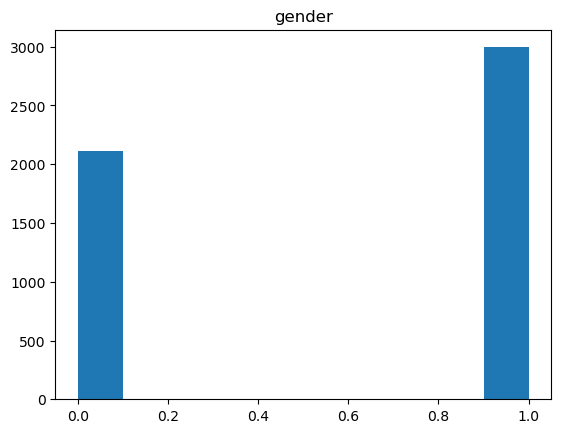

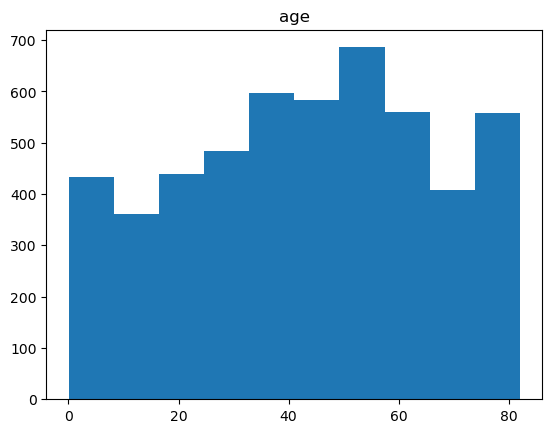

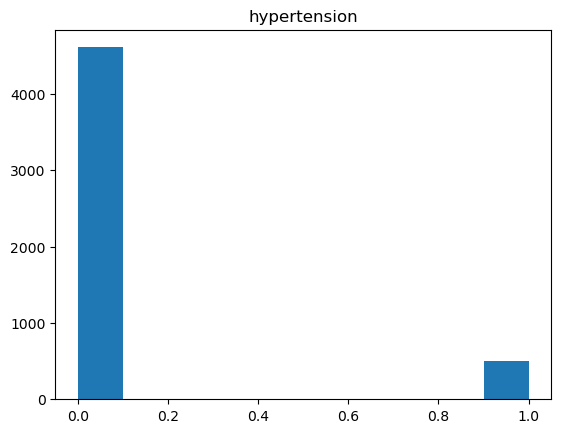

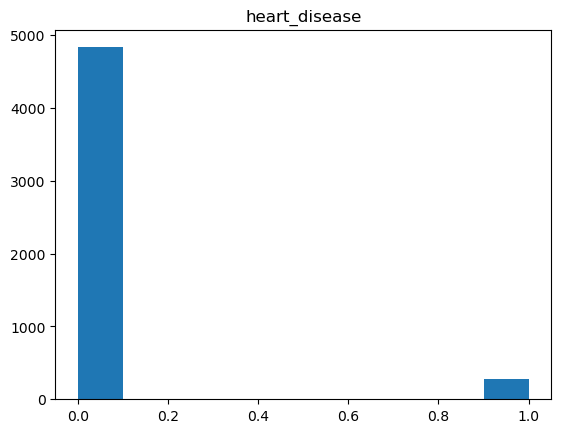

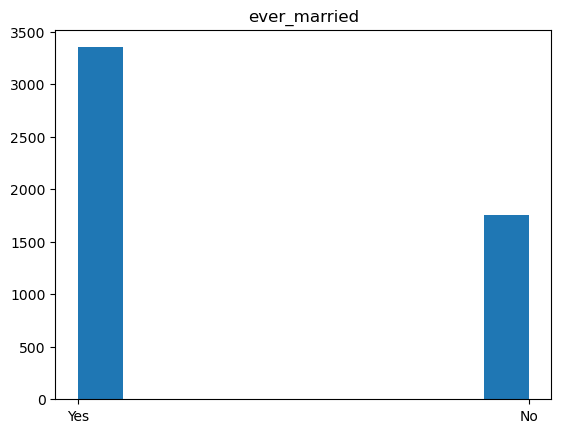

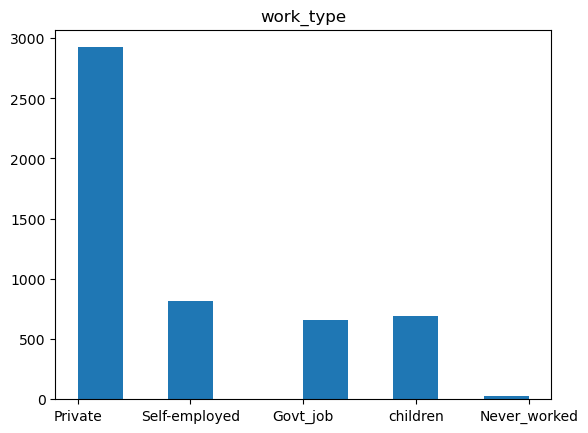

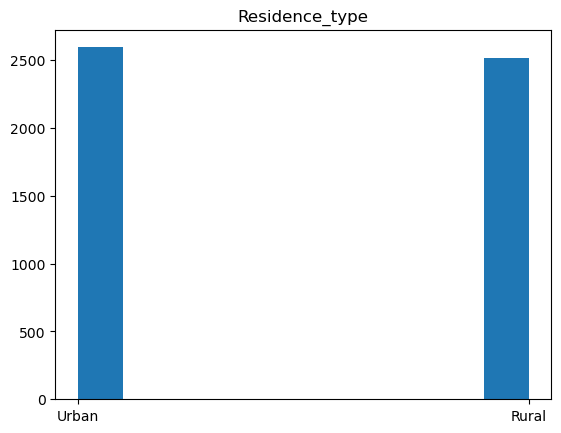

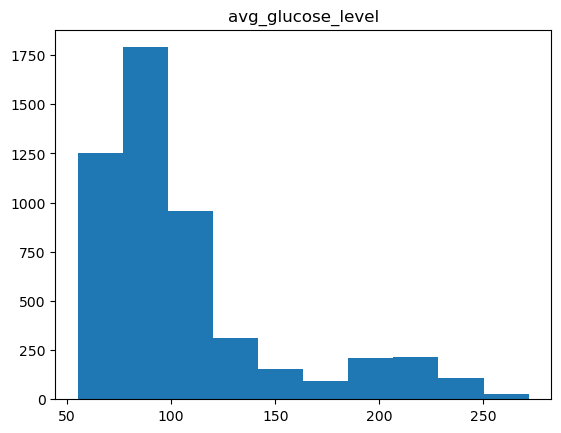

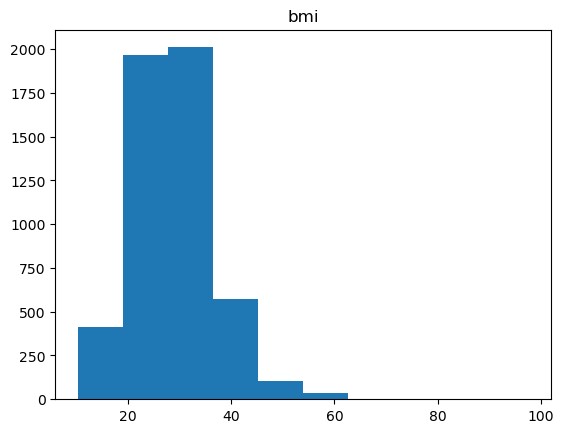

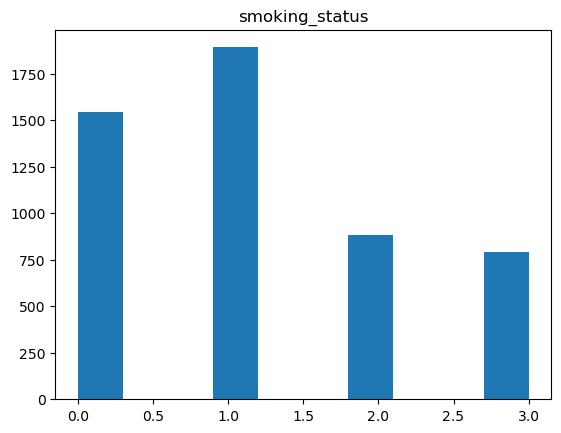

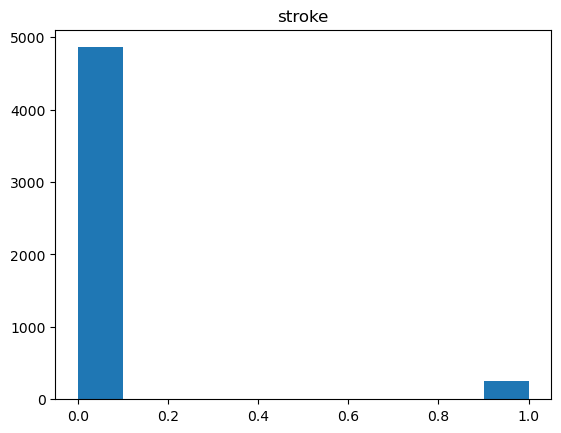

In [7]:
#Visual Reprentation
import matplotlib.pyplot as plt
for columns in df.columns:
    plt.hist(df[columns])
    plt.title(columns)
    plt.show ()

# Data Splitting

In [8]:
#Dividing the dataset
x=df[["gender","heart_disease","avg_glucose_level","smoking_status","bmi"]]
x


,gender,heart_disease,avg_glucose_level,smoking_status,bmi
0,0.0,1,228.69,2,36.600000
1,1.0,0,202.21,1,28.893237
2,0.0,1,105.92,1,32.500000
3,1.0,0,171.23,3,34.400000
4,1.0,0,174.12,1,24.000000
...,...,...,...,...,...
5105,1.0,0,83.75,1,28.893237
5106,1.0,0,125.20,1,40.000000
5107,1.0,0,82.99,1,30.600000
5108,0.0,0,166.29,2,25.600000


In [9]:
y=df["stroke"]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [10]:
# Scalling the X variable
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
x_scaled=scaler.fit(x)
x_scaled

StandardScaler()

In [11]:
#Data spliting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [12]:
len(x_train),len(y_train),len(x_test),len(y_test)

(3832, 3832, 1278, 1278)

# Logistic Regression

In [13]:
#Importing the Algorithm
from sklearn.linear_model import LogisticRegression

In [14]:
#Fitting the dataset
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
#finding Y_Predicted
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
4037,0,0
5072,0,0
22,1,0
4933,0,0
3356,0,0
...,...,...
3164,0,0
1350,0,0
1478,0,0
1101,0,0


In [17]:
#finding the accuracy_score of the model
from sklearn.metrics import accuracy_score, classification_report
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.9499217527386542

In [18]:
#report of the model
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1214
           1       0.00      0.00      0.00        64

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.93      1278



C:\Users\Language Lab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Language Lab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Language Lab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DecissionTree Algorithm

In [19]:
#Importing the Algorithm
from sklearn.tree import DecisionTreeClassifier

In [20]:
#Fitting the dataset
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
#finding Y_Predicted
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
4037,0,0
5072,0,0
22,1,0
4933,0,0
3356,0,0
...,...,...
3164,0,1
1350,0,0
1478,0,0
1101,0,0


In [23]:
#finding the accuracy_score of the model
Accuracy=accuracy_score(y_test,y_pred)
Accuracy


0.8943661971830986

In [24]:
#report of the model
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1214
           1       0.08      0.11      0.09        64

    accuracy                           0.89      1278
   macro avg       0.52      0.52      0.52      1278
weighted avg       0.91      0.89      0.90      1278



# Random Forest Algorithm

In [25]:
#Importing the Algorithm
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Fitting the dataset
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
#finding Y_Predicted
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
4037,0,0
5072,0,0
22,1,0
4933,0,0
3356,0,0
...,...,...
3164,0,0
1350,0,0
1478,0,0
1101,0,0


In [29]:
#finding the accuracy_score of the model
Accuracy=accuracy_score(y_test,y_pred)
Accuracy


0.9413145539906104

In [30]:
#report of the model
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1214
           1       0.00      0.00      0.00        64

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.90      0.94      0.92      1278



# Support Vector Machine Algorithm

In [31]:
#Importing the Algorithm
from sklearn.svm import SVC

In [32]:
#Fitting the dataset
model=SVC(kernel="linear",C=100,gamma="auto")
model.fit(x_train,y_train)

SVC(C=100, gamma='auto', kernel='linear')

In [33]:
#finding Y_Predicted
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
4037,0,0
5072,0,0
22,1,0
4933,0,0
3356,0,0
...,...,...
3164,0,0
1350,0,0
1478,0,0
1101,0,0


In [36]:
#finding the accuracy_score of the model
Accuracy=accuracy_score(y_test,y_pred)
Accuracy


0.9499217527386542